In [11]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("AdsorptionCobaltHydroxyapatite.csv")

In [3]:
df.head()

,Temperature (K),Co (mg/L),qe (mg/g)
0,239,0.00,0.00
1,239,0.03,0.10
2,239,0.21,0.48
3,239,0.48,0.92
4,239,1.14,1.44


In [4]:
"""
qe in mg/g: experimental data for absorption amount
ce in mg/L: equilibrium concentration (at certain temperature)
qe = qmax * K * Ce/(1 + K * Ce)
qmax: maximum absorption amount (mg/g)
K: absorption constant (L/mg)

여기서 해야 할 것은, qe = f(Co, K)로 regression 하는 것
"""

'\nqe in mg/g: experimental data for absorption amount\nce in mg/L: equilibrium concentration (at certain temperature)\nqe = qmax * K * Ce/(1 + K * Ce)\nqmax: maximum absorption amount (mg/g)\nK: absorption constant (L/mg)\n\n여기서 해야 할 것은, qe = f(Co, K)로 regression 하는 것\n'

In [5]:
df['Temperature (K)'].unique()

array([239, 303, 313], dtype=int64)

In [6]:
df_239 = df[df['Temperature (K)'] == 239]

In [7]:
df_303 = df[df['Temperature (K)'] == 303]

In [8]:
df_313 = df[df['Temperature (K)'] == 313]

In [9]:
def calculate_correlation(x: np.array, y: np.array):
    r, p = stats.pearsonr(x, y)
    print("corr:", r, "p-value:", p)
    if p < 0.05:
        print("The null hypothesis can be rejected. (correlated)")
    else:
        print("The null hypothesis cannot be rejected. (uncorrelated)")

In [10]:
calculate_correlation(df['Co (mg/L)'], df['Temperature (K)'])

corr: -0.06401608638548223 p-value: 0.782795517681849
The null hypothesis cannot be rejected. (uncorrelated)


Text(0.5, 1.0, 'Scatter Graph')

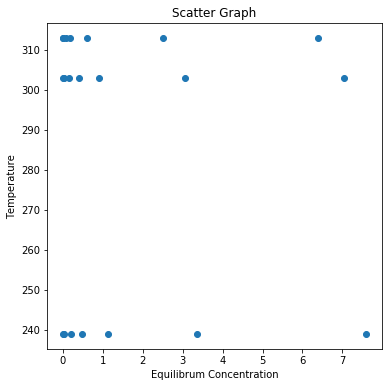

In [49]:
fig = plt.figure(figsize = [6, 6])   # fig
plt.scatter(df['Co (mg/L)'], df['Temperature (K)'])
plt.xlabel('Equilibrum Concentration')
plt.ylabel('Temperature')
plt.title('Scatter Graph')

In [24]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [21]:
X = df[['Co (mg/L)', 'Temperature (K)']]
Y = df['qe (mg/g)']

In [22]:
# with sklearn
reg = linear_model.LinearRegression()
reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
print('Intercept: \n', reg.intercept_)
print('Coefficients: \n', reg.coef_)

# with statsmodels
X = sm.add_constant(X) # adding a constant

# Ordinary Least Square Methods
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
 
print_model = model.summary()
print(print_model)

Intercept: 
 -2.6551055018924394
Coefficients: 
 [0.63910757 0.0116708 ]
                            OLS Regression Results                            
Dep. Variable:              qe (mg/g)   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     40.31
Date:                Wed, 05 May 2021   Prob (F-statistic):           2.25e-07
Time:                        10:27:16   Log-Likelihood:                -23.479
No. Observations:                  21   AIC:                             52.96
Df Residuals:                      18   BIC:                             56.09
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

In [33]:
model.params

const             -2.655106
Co (mg/L)          0.639108
Temperature (K)    0.011671
dtype: float64

In [36]:
X['Co (mg/L)'].max()

7.6

Text(0.5, 0.92, 'MULTIPLE LINEAR REGRESSION')

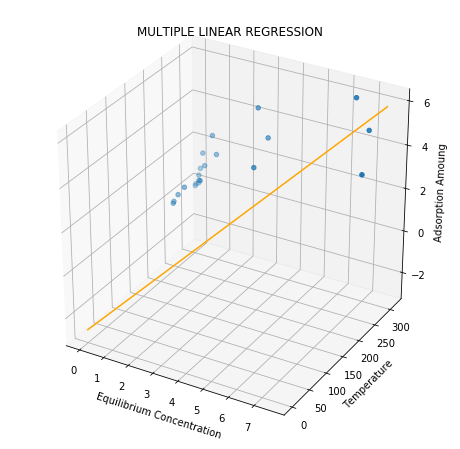

In [47]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = [8, 8])
ax = fig.gca(projection = '3d')
ax.scatter3D(X['Co (mg/L)'], X['Temperature (K)'], Y)

# Data for a three-dimensional line
xline = np.linspace(0, X['Co (mg/L)'].max(), 1000)
yline = np.linspace(0, X['Temperature (K)'].max(), 1000)
zline = 0.639108 * xline + 0.011671 * yline -2.655106
ax.plot3D(xline, yline, zline, 'orange')
ax.set_xlabel("Equilibrium Concentration")
ax.set_ylabel("Temperature")
ax.set_zlabel("Adsorption Amoung")
ax.set_title("MULTIPLE LINEAR REGRESSION")